# Image smoothing and different filters

Some interesting image manipulations with skimage.data: http://scikit-image.org/docs/dev/api/skimage.data.html

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, data, transform, filters, img_as_float
from scipy import ndimage as ndi

In [44]:
plt.rcParams['image.cmap'] = 'gray' #otherwise plts are virids

Applying a mean and Gaussian filter.

The Gaussian filter doesn't weight all values in the neighborhood equally. Instead, pixels closer to the center are weighted more than those farther away. The result is an image with less artifacts (notice the legs of the camera stand). The reason is that the mean filter does not take distance into account whereas the Gaussian filter does, sigma=1, as the standard deviation default. 

img_as_float used so images are of comparable intensity. Why: the gaussian filter returns a float. 

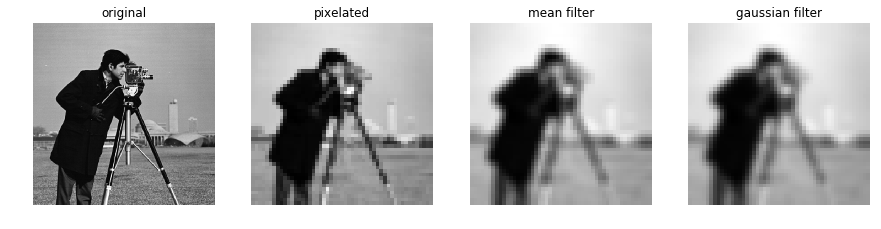

In [75]:
image = data.camera()
pixelated = img_as_float(transform.rescale(image, 0.1)) 
mean_kernel = np.full((3,3),1/9)
filtered = ndi.convolve(pixelated, mean_kernel);
gaussian = filters.gaussian(pixelated)

fig, ax = plt.subplots(1, 4, figsize=(15, 5))
for a in ax:
    a.axis('off')
ax[0].imshow(image)
ax[0].set_title('original')
ax[1].imshow(pixelated)
ax[1].set_title('pixelated')
ax[2].imshow(filtered)
ax[2].set_title('mean filter')
ax[3].imshow(gaussian)
ax[3].set_title('gaussian filter');

$$
k_{r, c} = \frac{1}{2\pi \sigma^2} \exp{\left(-\frac{r^2 + c^2}{2\sigma^2}\right)}
$$

### Showing the Gaussian curve on a filtered image

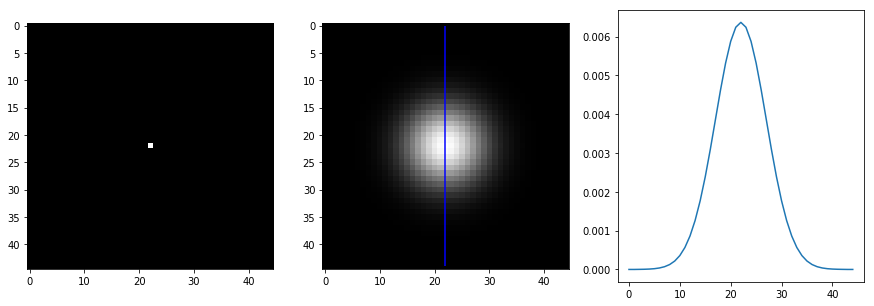

In [119]:
size = 45
square = (np.full((size, size), 0)).astype(float)
square[size // 2, size // 2] = 1
sigma = (size- 1) // 2 // 4
kernel = filters.gaussian(square, sigma=sigma)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(square)
ax[1].imshow(kernel / np.max(kernel))
ax[1].vlines(22, 0, 44, color='b')
ax[2].plot(kernel[22, :]);